# Informações sobre os dados utilizados neste projeto
Os dados utilizados aqui foram encontrados no site kaggle e é uma base de dados com as informações de partidas de futebol realizadas na premier league em 2021/22

# Importação das bibliotecas utilizadas neste projeto e carregamento dos dados utilizados

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches = pd.read_csv('soccer21-22.csv')

# Descrição das colunas
* Date = data do jogo

* HomeTeam = time mandant

* AwayTeam = time visitante

* FTHG = gols marcados pelo time mandante

* FTAG = gols marcados pelo time visitante

* FTR = resultados da partida(H = HomeTeam venceu,A = AwayTeam venceu, D = empate)

* HTHG = gols do time mandante no primeiro tempo

* HTAG = gols do time visitante no primeiro tempo

* HTR = resultado do primeiro tempo(H = HomeTeam venceu,A = AwayTeam venceu, D = empate)

* Referee = juiz que arbitrou o jogo

* HS = chutes dados pelo time mandante

* AS = chutes dados pelo time visitante

* HST = chutes no gol dados pelo time mandante

* AST = chutes no gol dados pelo time visitante

* HF = faltas cometidas pelo time mandante

* AF = faltas cometidas pelo time visitante

* HC = escanteios cobrados pelo time mandante

* AC = escanteios cobrados pelo time visitante

* HY = cartões amarelos recebidos pelo time mandante

* AY = cartões amarelos recebidos pelo time visitante

* HR = cartões vermelhos recebidos pelo time mandante

* AR = cartões vermelhos recebidos pelo time visitante

# Análise  exploratória dos dados

## Extraindo informações básicas sobre os dados e visualizando a distribuição de informações mais importantes

In [11]:
matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [5]:
matches.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
375,22/05/2022,Crystal Palace,Man United,1,0,H,1,0,H,M Atkinson,...,3,4,12,22,3,6,2,4,0,0
376,22/05/2022,Leicester,Southampton,4,1,H,0,0,D,J Moss,...,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,...,8,5,6,3,5,3,1,0,0,0
378,22/05/2022,Man City,Aston Villa,3,2,H,0,1,A,M Oliver,...,5,2,5,11,13,1,0,1,0,0
379,22/05/2022,Norwich,Tottenham,0,5,A,0,2,A,C Kavanagh,...,0,13,13,7,3,2,3,1,0,0


In [14]:
matches.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [6]:
matches.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [8]:
matches.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,5.602632,4.821053,1.652632,1.744737,0.050000,0.063158
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,3.029755,2.735399,1.258373,1.230912,0.230005,0.243567
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000,1.500000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,7.000000,7.000000,2.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,15.000000,13.000000,6.000000,5.000000,2.000000,1.000000


In [68]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
Date        380 non-null object
HomeTeam    380 non-null object
AwayTeam    380 non-null object
FTHG        380 non-null int64
FTAG        380 non-null int64
FTR         380 non-null object
HTHG        380 non-null int64
HTAG        380 non-null int64
HTR         380 non-null object
Referee     380 non-null object
HS          380 non-null int64
AS          380 non-null int64
HST         380 non-null int64
AST         380 non-null int64
HF          380 non-null int64
AF          380 non-null int64
HC          380 non-null int64
AC          380 non-null int64
HY          380 non-null int64
AY          380 non-null int64
HR          380 non-null int64
AR          380 non-null int64
dtypes: int64(16), object(6)
memory usage: 65.4+ KB


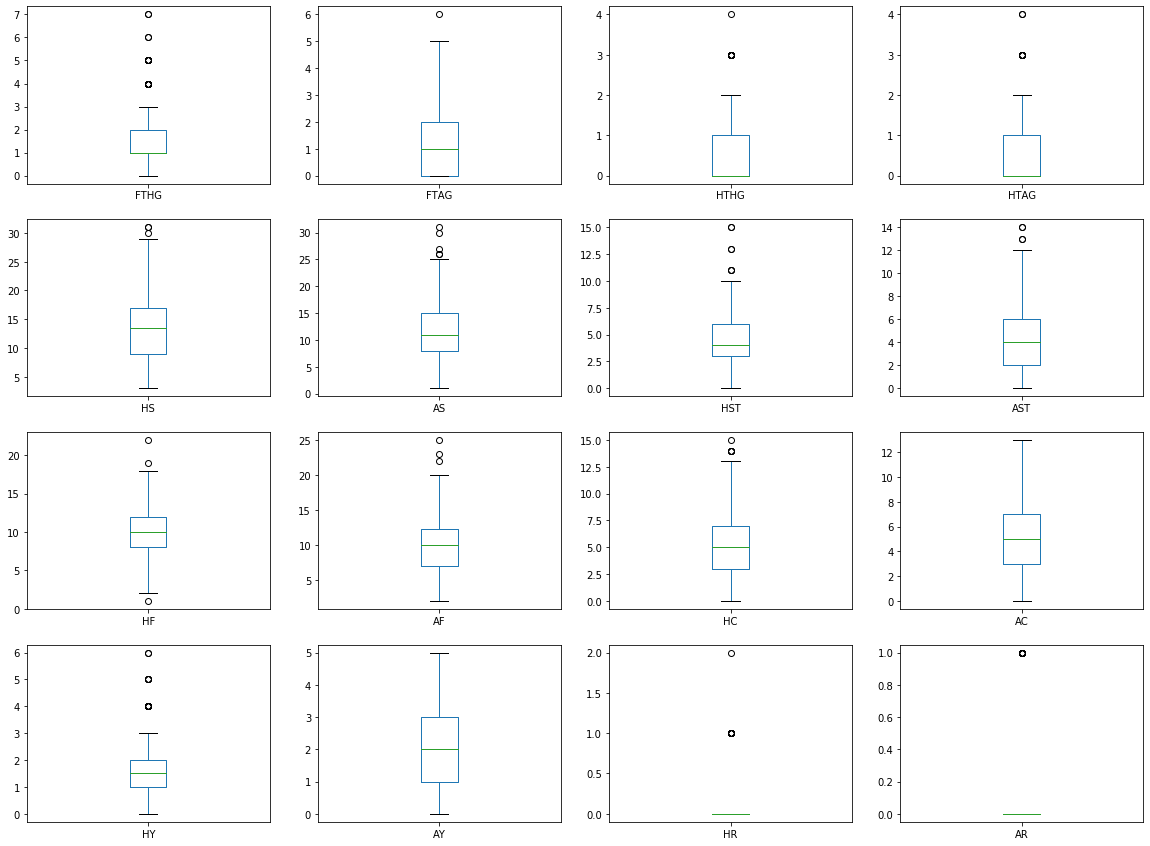

In [70]:
matches.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (20,15));

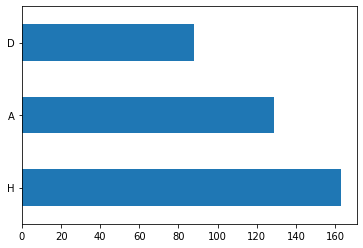

In [94]:
matches['FTR'].value_counts().plot(kind='barh')

Baseado na distribuição do gráfico acima pode-se entender que o empate é o resultado com menor taxa de reincidência enquanto a vitória do time mandande é o mais comum.

# Distribuição de gols feito 

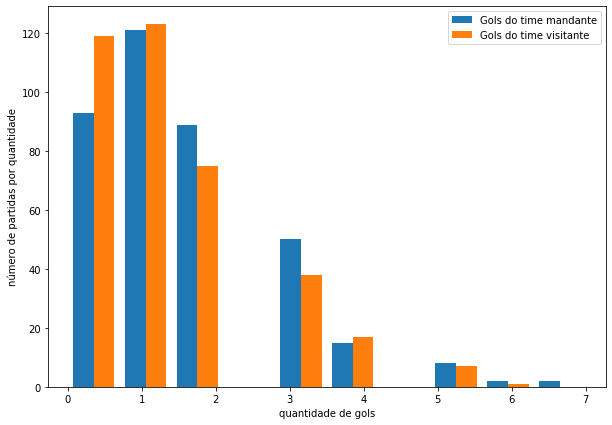

In [66]:
HomeGoal=matches['FTHG']
AwayGoal = matches['FTAG']
plt.figure(figsize=(10,7))
plt.hist([HomeGoal,AwayGoal],bins=10,data=matches,label=['Gols do time mandante','Gols do time visitante'])
plt.legend(loc='upper right')
plt.xlabel('quantidade de gols')
plt.ylabel('número de partidas por quantidade')

plt.show()

Visualizando o histograma acima é possível entender que é pouco comum uma quantidade acima de 3 gols nas partidas seja para o time mandante ou para o time visitante.

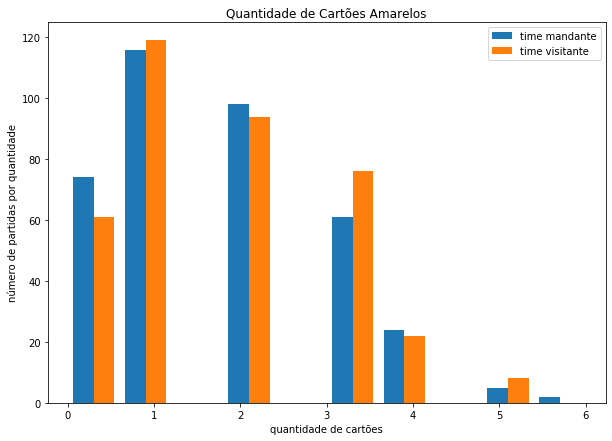

In [78]:
Home_yellow_cards=matches['HY']
Away_yellow_cards = matches['AY']
plt.figure(figsize=(10,7))
plt.hist([Home_yellow_cards,Away_yellow_cards],bins=10,data=matches,label=['time mandante','time visitante'])
plt.title('Quantidade de Cartões Amarelos')
plt.legend(loc='upper right')
plt.xlabel('quantidade de cartões')
plt.ylabel('número de partidas por quantidade')

plt.show()

Vemos que a quantidade de cartões amarelos recebidos por times mandantes e visitantes é similar então dá para se entender que o mando do campo não influência neste quesito.

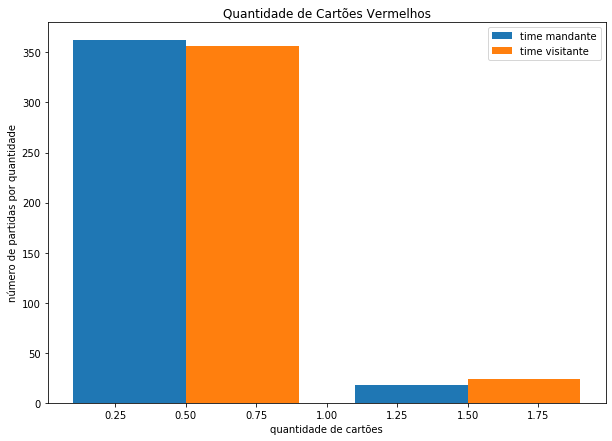

In [80]:
Home_red_cards=matches['HR']
Away_red_cards = matches['AR']
plt.figure(figsize=(10,7))
plt.hist([Home_red_cards,Away_red_cards],bins=2,data=matches,label=['time mandante','time visitante'])
plt.title('Quantidade de Cartões Vermelhos')
plt.legend(loc='upper right')
plt.xlabel('quantidade de cartões')
plt.ylabel('número de partidas por quantidade')

plt.show()

É possível visualizar que poucas vezes houveram cartões vermelhos em qualquer partida do campeonato.

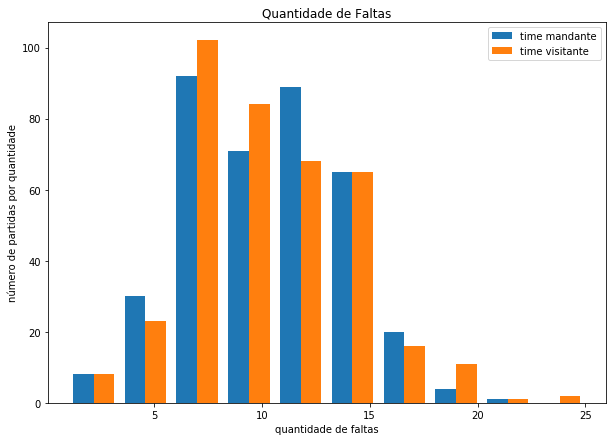

In [92]:
Home_fouls=matches['HF']
Away_fouls = matches['AF']
plt.figure(figsize=(10,7))
plt.hist([Home_fouls,Away_fouls],data=matches,label=['time mandante','time visitante'])
plt.title('Quantidade de Faltas')
plt.legend(loc='upper right')
plt.xlabel('quantidade de faltas')
plt.ylabel('número de partidas por quantidade')

plt.show()

Percebe-se que o mando de campo também não influência nas quantidades de falta, observando que apesar de haver uma quantidade um pouco maior de faltas cometidas por times visitantes as quantidades são similares.